In [7]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

In [16]:
data_path='/media/maria/DATA1/Documents/old_data/natimg2800_white_M170717_MP034_2017-09-14.mat'
activity_patterns=io.loadmat(data_path)['stim'][0]['resp'][0]
act=np.pad(activity_patterns, ((0,0),(0, 10000-9479)), 'constant', constant_values=(0, 0))

In [4]:
print(activity_patterns.shape)

(4040, 9479)


In [17]:
mult=np.multiply(act[0,:],act[1,:])
print(mult.shape)


(10000,)


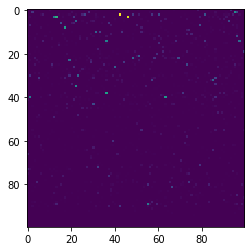

In [18]:
plt.imshow(mult.reshape(100,100))